# Exploratory data analysis, EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from typing import Callable

Описание столбцов:

- item_id : item id wich can be used later to merge with other IKEA dataframes
- name: the commercial name of items
- category: the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)
- Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
- old_price: the price of item in Saudi Riyals before discount
- Short_description: a brief description of the item
- full_Description: a very detailed description of the item. Because it is long, it is dropped from the final dataframe, but it is available in the code in case it needs to be analyzed.
- designer: The name of the designer who designed the item. this is extracted from the full_description column.
- size: the dimensions of the item including a lot of details.As a lot of dimensions mentioned and they vary from item to item, the most common dimensions have been extracted which are: Height, Wideh, and Depth. This column is dropped from the final dataframe, but it is available in the code in case it is needed.
- width: Width of the item in Centimeter
- height: Height of the item in Centimeter
- depth: Depth of the item in Centimeter
- sellable_Online: if the item is available for online purchasing or in-stores only (Boolean)
- other_colors: if other colors are available for the item, or just one color as displayed in the website (Boolean)
- link: the web link of the item


Regression: Predict the Sales Price of new items

Classification: Predict the category of new items

Classification: Predict if an item will be discounted

1) Прочитать файл IKEA_SA_Furniture_Web_Scrapings.csv и записать в переменную df

In [2]:
df = pd.read_csv("IKEA_SA_Furniture_Web_Scrapings.csv")

2) Вывести первые пять строк

In [3]:
df[:5]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


Внимательно изучите данные и попробуйте их осознать без применения пока графиков и стат параметров. Прочитайте подробнее, что значит каждое поле

3) Выведите размер датасета

In [4]:
df.shape

(3694, 13)

4) Вывести общую информацию о датафрейме при помощи метода info()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 350.0+ KB


5) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [6]:
df.isna().sum() / df.shape[0] * 100

item_id               0.000000
name                  0.000000
category              0.000000
price                 0.000000
old_price             0.000000
sellable_online       0.000000
link                  0.000000
other_colors          0.000000
short_description     0.000000
designer              0.000000
depth                39.604764
height               26.746075
width                15.944775
dtype: float64

6) Вывести основные описательные статистики для числовых признаков

In [7]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


7) Вывести основные описательные статистики для булевых и категориальных признаков

In [8]:
df.describe(include=object)

,name,category,old_price,link,other_colors,short_description,designer
count,3694,3694,3694,3694,3694,3694,3694
unique,607,17,365,2962,2,1706,381
top,BESTÅ,Tables & desks,No old price,https://www.ikea.com/sa/en/p/norraker-norraker...,No,Chair,IKEA of Sweden
freq,173,612,3040,4,2182,59,828


8) Проанализировать признак old_price, посмотреть на **уникальные значения** (понадобится в следующем задании)

In [9]:
df["old_price"].unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

9) **Написать функцию** (пока без применения) получения цены в формате float из признака **old_price** (преобразование значений признака в этой же колонке). 

Пояснение:

- Если имеем значение = 'No old price' в old_price, то оставляем исходную цену, то есть берем значение из признака **price**
- Там, где присутствует значение **pack** в old_price, нужно просто убрать все то, что идет после знака /
- Например, цена SR 5,640 в old_price читается как SR 5640 (то есть без запятой), по итогу должны получить новое значение 5640
- На вход должны подаваться значения старой и новой цены

In [10]:
# data_old - значение из old_price
# data_price - значение из price
# return предобработанная цена old_price

def change_old_price(data_old: str, data_price: str) -> float:
    "Converting 'old_price' from object to float"
    if data_old == "No old price":
        return data_price
    else:
        number = data_old.split(" ")[1].replace(",", "")
        
        if number.find("/") != -1:
                number_elems = number.split("/")
                return float(number_elems[0]) / float(number_elems[1])
            
        return float(number)

10) Генерация и преобразование признаков
- Создать признак **flg_old_price**, где 0 - это означает, что есть значение **'No old price'** в признаке **old_price**, иначе поставить 1 (флаг)
- Преобразовать признак **old_price** при помощи написанной функции **change_old_price()** в задании 9
- Создать признак **discount_amount** = старая цена - цена
- Создать признак **flg_discount**, где 0 - это означает, что значение в признаке **discount_amount** отлично от нуля, иначе поставить 1 (флаг)

In [11]:
df["flg_old_price"] = df["old_price"].transform(
    lambda x: int(x != "No old price"))
df["old_price"] = df.apply(lambda row: change_old_price(
    row["old_price"], row["price"]), axis=1)
df["discount_amount"] = df["old_price"] - df["price"]
df["flg_discount"] = df.discount_amount.transform(lambda x: int(x != 0))

In [12]:
df[:5]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,flg_old_price,discount_amount,flg_discount
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,0.0,0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,0.0,0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,0.0,0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,0,0.0,0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,0.0,0


<div class="alert alert-block alert-success">
    
Представим, что мы будем решать задачу регрессии и на новых товарах предсказывать **новую** цену.

С учетом этого выдвените свои гипотезы далее
</div>

## 1 Гипотеза

- Старые и новые цены отличаются друг от друга, новые цены выше

Построить график распределения старой и текущих цен (уместить на одном графике), есть ли видимые отличия?

<AxesSubplot: ylabel='Density'>

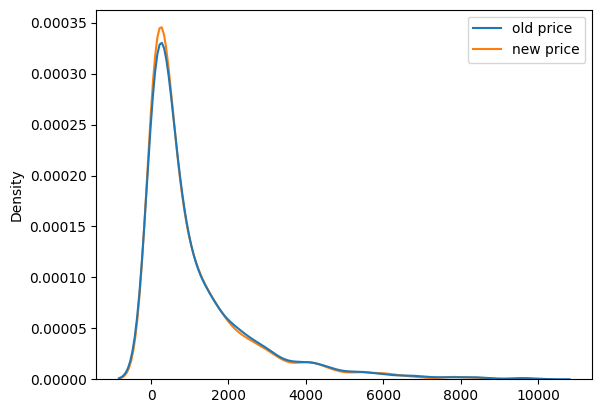

In [13]:
sns.kdeplot(data={"old price": df["old_price"], "new price": df["price"]})

**Сделайте выводы**

- Видимых отличий между старыми и текущими ценами нет
- 

<AxesSubplot: xlabel='price', ylabel='Density'>

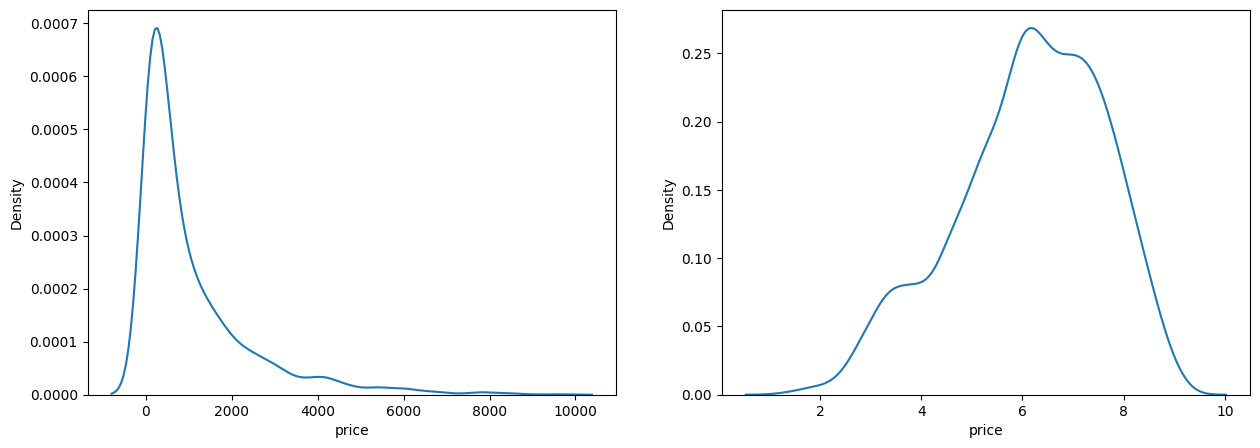

In [14]:
fgr, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(df.price, ax=axes[0])
sns.kdeplot(np.log(df.price + 1), ax=axes[1])

- Распределение цены не является нормальным, сглаживание с помощью логарифма также не привело распределение к нормальному виду

In [15]:
def bootstrap_resample(data: pd.Series,
                       function: Callable,
                       count_mean: int = 1000,
                       random_state: int = 10) -> list:
    """
    Bootstrap
    """
    sample_size = len(data)
    np.random.seed(random_state)
    bootstrap_sample = []

    for i in range(count_mean):
        sample = data.sample(sample_size, replace=True)
        bootstrap_sample.append(function(sample))

    return bootstrap_sample

<AxesSubplot: ylabel='Density'>

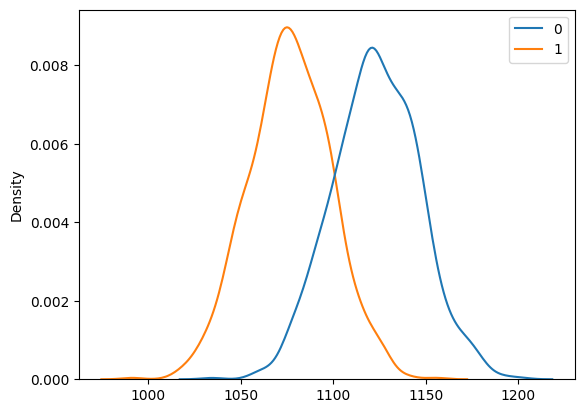

In [77]:
from scipy import stats

sample_price_bs = bootstrap_resample(df.price, np.mean)
sample_old_price_bs = bootstrap_resample(df.old_price, np.mean)

sns.kdeplot(data=(sample_old_price_bs, sample_price_bs))

<AxesSubplot: ylabel='Density'>

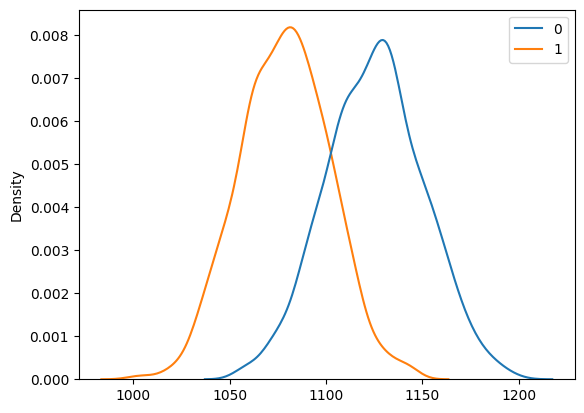

In [83]:
means_price_cpt = []
means_old_price_cpt = []

for i in range(1000):
    sample_n = df.price.sample(1800)
    means_price_cpt.append(np.mean(sample_n))
    
    sample_o = df.old_price.sample(1800)
    means_old_price_cpt.append(np.mean(sample_o))
    
sns.kdeplot(data=(means_old_price_cpt, means_price_cpt))

<AxesSubplot: ylabel='Density'>

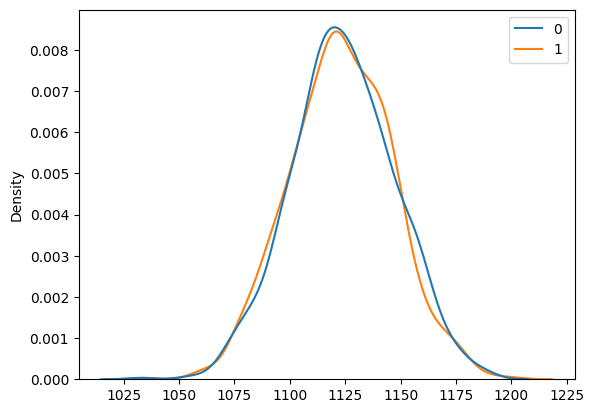

In [80]:
sns.kdeplot(data=(means_old_price_cpt, sample_old_price_bs))

<AxesSubplot: ylabel='Density'>

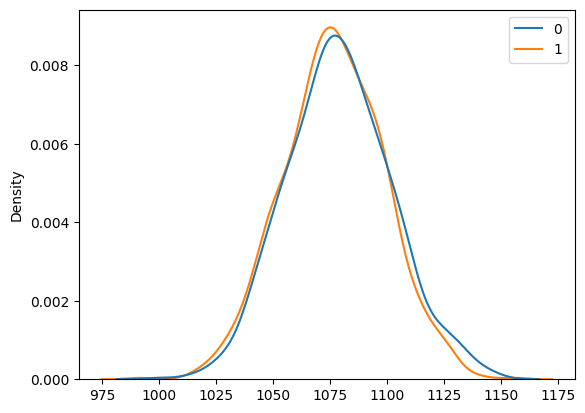

In [81]:
sns.kdeplot(data=(means_price_cpt, sample_price_bs))

In [104]:
print(np.mean(df.old_price))
print(np.mean(means_old_price_cpt))
print(np.mean(sample_old_price_bs))
print(np.mean(df.price))
print(np.mean(means_price_cpt))
print(np.mean(sample_price_bs))

1124.9041689225771
1125.3975625
1123.118975230103
1078.208419057932
1078.6071907222222
1076.4954539523553


<div class="alert alert-block alert-warning"> 
Тут либо тогда уже при помощи bootstrap находить различия, либо при помощи ЦПТ генерировать выборки, что довольно странно, можно было просто взять сэмпл данных и поискать при помощи другого критерия разницу
    
плюс неверно применили критерий Стьюдента, пересмотрите еще раз лекцию по статистике с кодом обязательно =)
</div>

<div class="alert alert-block alert-success"> 
Хорошо, путем исследования я понял, что применять критерий Стьюдента к выборке bootstrap не корректно, потому что этот алгоритм как-то не естественно ее деформирует, из-за чего все оценки значимости не достоверны. 
</div>

In [130]:
# H0 - среднее sample_o не выше, чем среднее sample_n

stats.ttest_ind(sample_o, sample_n, alternative='greater').pvalue

0.0950923911063958

In [107]:
# H0 - среднее sample_old_price_bs не выше, чем среднее sample_price_bs

stats.ttest_ind(sample_old_price_bs, sample_price_bs, alternative='greater').pvalue

1.463082096e-315

- Pvalue равен 0.095, что говорит о том, что при уровне значимость 0.05 нулевая гипотеза подтверждается.

In [131]:
# H0 - среднее sample_o равно среднему sample_n

stats.ttest_ind(sample_o, sample_n, alternative='two-sided').pvalue

0.1901847822127916

- 0.19 > 0.05 => H0 верна. Средние старых и новых цен схожи

## 2 Гипотеза

- Текущие цены в онлайн и оффлайн не отличаются в разрезе наличия скидки (признак flg_discount)

Сравнить при помощи boxplot и displot текущую цену при разных значениях sellable_online, есть ли разница?

Для графика boxplot также проанализировать различия в разрезе flg_discount (параметр hue)

In [108]:
df.sellable_online.value_counts()

True     3666
False      28
Name: sellable_online, dtype: int64

- В целом, для сравнительного анализа слишком мало объектов с sellable_online = False

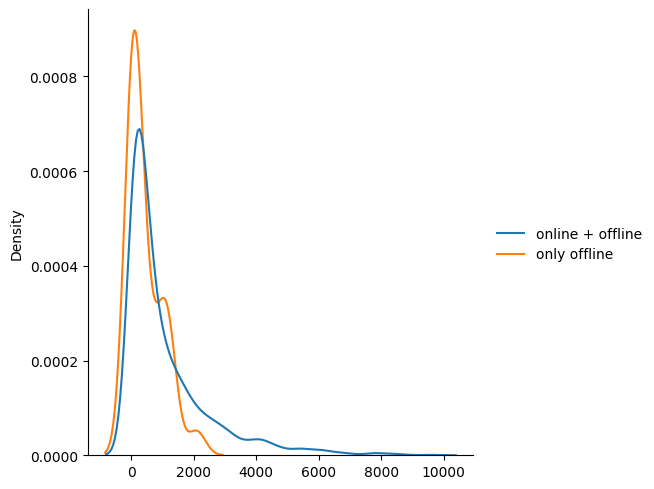

In [109]:
sns.displot({"online + offline": df[df.sellable_online == True].price,
             "only offline": df[df.sellable_online == False].price},
            kind='kde', common_norm = False)

<AxesSubplot: xlabel='price', ylabel='sellable_online'>

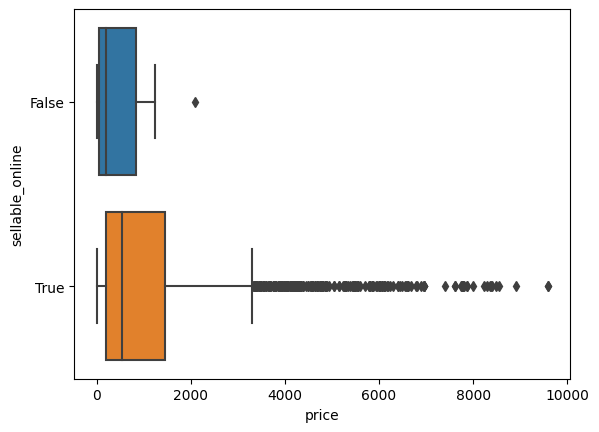

In [110]:
sns.boxplot(data=df, x='price', y='sellable_online', orient='h')

<AxesSubplot: xlabel='price', ylabel='flg_discount'>

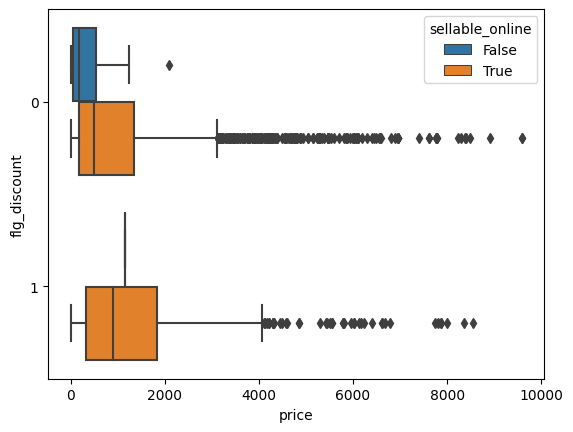

In [111]:
sns.boxplot(data=df, x = "price", y = "flg_discount", hue = "sellable_online", orient='h')

**Сделайте выводы**

- Относительно признака sellable_online выборка не сбалансирована, объектов типа sellable_online = False явно недостаточно для того, чтобы делать достоверные выводы относительно цены.
- Однако исходя из имеющихся данных цена объектов, продающихся только в оффлайн, ниже.
- Если интерпритировать объекты sellable_online = True, как объекты, которые продаются и онлайн, и оффлайн, а оффлайн продаются все объекты , тогда выборки объектов (оффлайн) и объектов (онлайн & оффлайн) статически не различаются, так как выборка объектов только оффлайн мала.

## 3 Гипотеза

- Цвет предмета влияет на его цену

Сравнить при помощи boxplot и displot цену при разных значениях other_colors, есть ли разница?

In [112]:
df.other_colors.value_counts()

No     2182
Yes    1512
Name: other_colors, dtype: int64

<AxesSubplot: xlabel='price', ylabel='other_colors'>

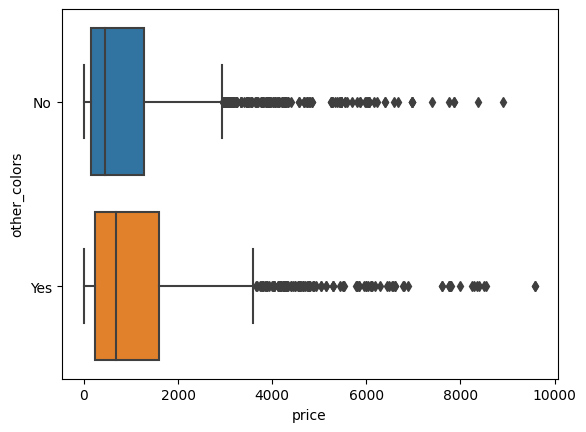

In [113]:
sns.boxplot(data=df, x = "price", y = "other_colors", orient='h')

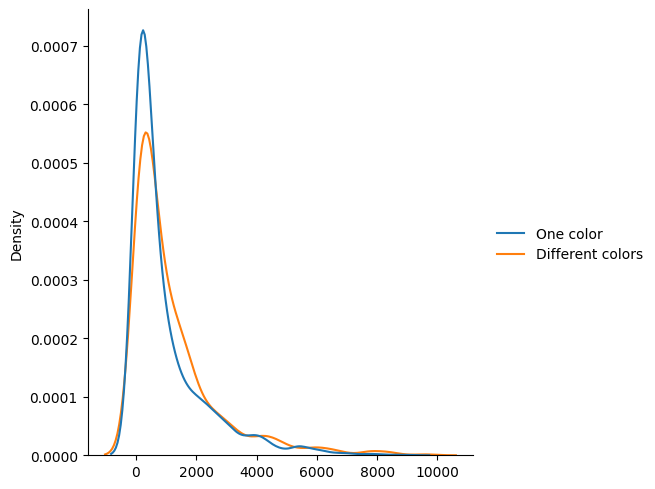

In [114]:
sns.displot(data={"One color": df[df.other_colors == "No"].price,
                  "Different colors": df[df.other_colors == "Yes"].price},
            kind="kde", common_norm=False)

**Сделайте выводы**

- По boxplot видно, что объекты с возможностью изменить цвет дороже
- По displot можно утверждать, что ценовые распределения объектов с возможностью цветовой кастомизации и объектов без такой возможности практически идентичны  

## Ваши гипотезы

Необходимо написать как минимум еще 4 гипотезы, которые в последствии нужно проанализировать при помощи графиков
- Использовать обязательно heatmap (подсказка: его не обязательно использовать только для корреляции, можно оценивать наглядно сами числовые значения в той или иной группе), boxplot, pairplot, countplot, если необходимо, то и другие типы графиков
- В гипотезах постараться задействовать такие признаки как: цена, категория, ширина, высота, глубина, discount_amount, other_colors, flg_discount и дргуие
- Исходить из той задачи, что мы хотим предсказать **ЦЕНУ ТОВАРА на новых данных**, постараться написать и исследовать гипотезы так, чтобы они были понятны бизнесу со всеми пояснениями
- Обязательно проанализировать взаимосвязь средних показателей товаров по габаритам в разрезе категории, а также взаимосвязь габаритов с ценой товара
- Если вы хотите создать новые признаки, то обязательно это нужно сделать с учетом бизнес-задачи, и чтобы это помогло в анализе ваших данных


**Также важно учесть:**

<div class="alert alert-block alert-danger">

- Если ваша гипотеза никак не будет связана с итоговой целью - предсказать цену товара, то она не засчитывается.

- Например, такая гипотеза - в разных категориях есть разные дизайнеры. Не совсем понятно, о чем гипотеза, что мы хотим этим показать, какой value для нас она может принести? Таких гипотез быть не должно
- Не обязательно напрямую анализировать все признаки в разрезе цены, можно, к примеру анализировать и величину скидки, так как это нам тоже говорит, изменится цена или нет, либо анализировать габариты товаров и соответствующую скидку на них и так далее.
- Также здорово посмотреть чуть дальше, чем просто цена, например, а какие товары занимают больше места на складе, потенциально и это может влиять на множество бизнес-показателей

</div> 

## Гипотеза 4

<div class="alert alert-block alert-warning"> 
Представьте, что вы приходите к своему начальнику =)
Он от вас просит набросать гипотезы, вы ему так и говорите, что определенные категории товаров нуждаются в скидке? =)
</div>

### Существует взаимосвязь между тем, как часто снижается цена в виде скидки, и категорией товара

In [115]:
df.category.value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

In [116]:
data_percent = df[df["flg_discount"] == 1].category.value_counts(
                                ).values / df.category.value_counts().values
data_percent

array([0.19117647, 0.17153285, 0.17047817, 0.18691589, 0.23287671,
       0.22457627, 0.23148148, 0.19711538, 0.12631579, 0.152     ,
       0.07258065, 0.05154639, 0.08510638, 0.10714286, 0.07692308,
       0.08695652, 0.07692308])

<AxesSubplot: >

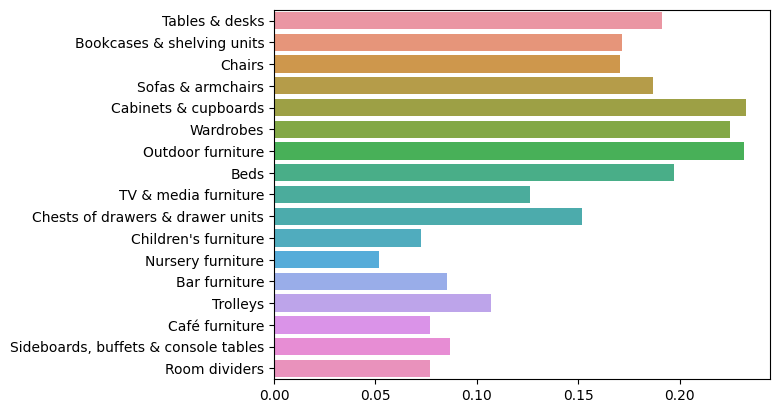

In [117]:
sns.barplot(y=df.category.value_counts().index, x=data_percent, orient='h')

- На графике изображен процент товаров, на которые была снижена цена в виде скидки.

<div class="alert alert-block alert-warning"> 
На графике отображена не частота
</div>

- Из графика можно сделать вывод, что на товары определенных групп чаще снижается цена в виде скидки.   

## Гипотеза 5

### Габариты товара влияют на его цену

In [118]:
mean_values = df.groupby(["category"]).mean()

/tmp/ipykernel_7323/4141931478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values = df.groupby(["category"]).mean()


In [119]:
df["sum_sides"] = df["depth"] + df["width"] + df["height"]

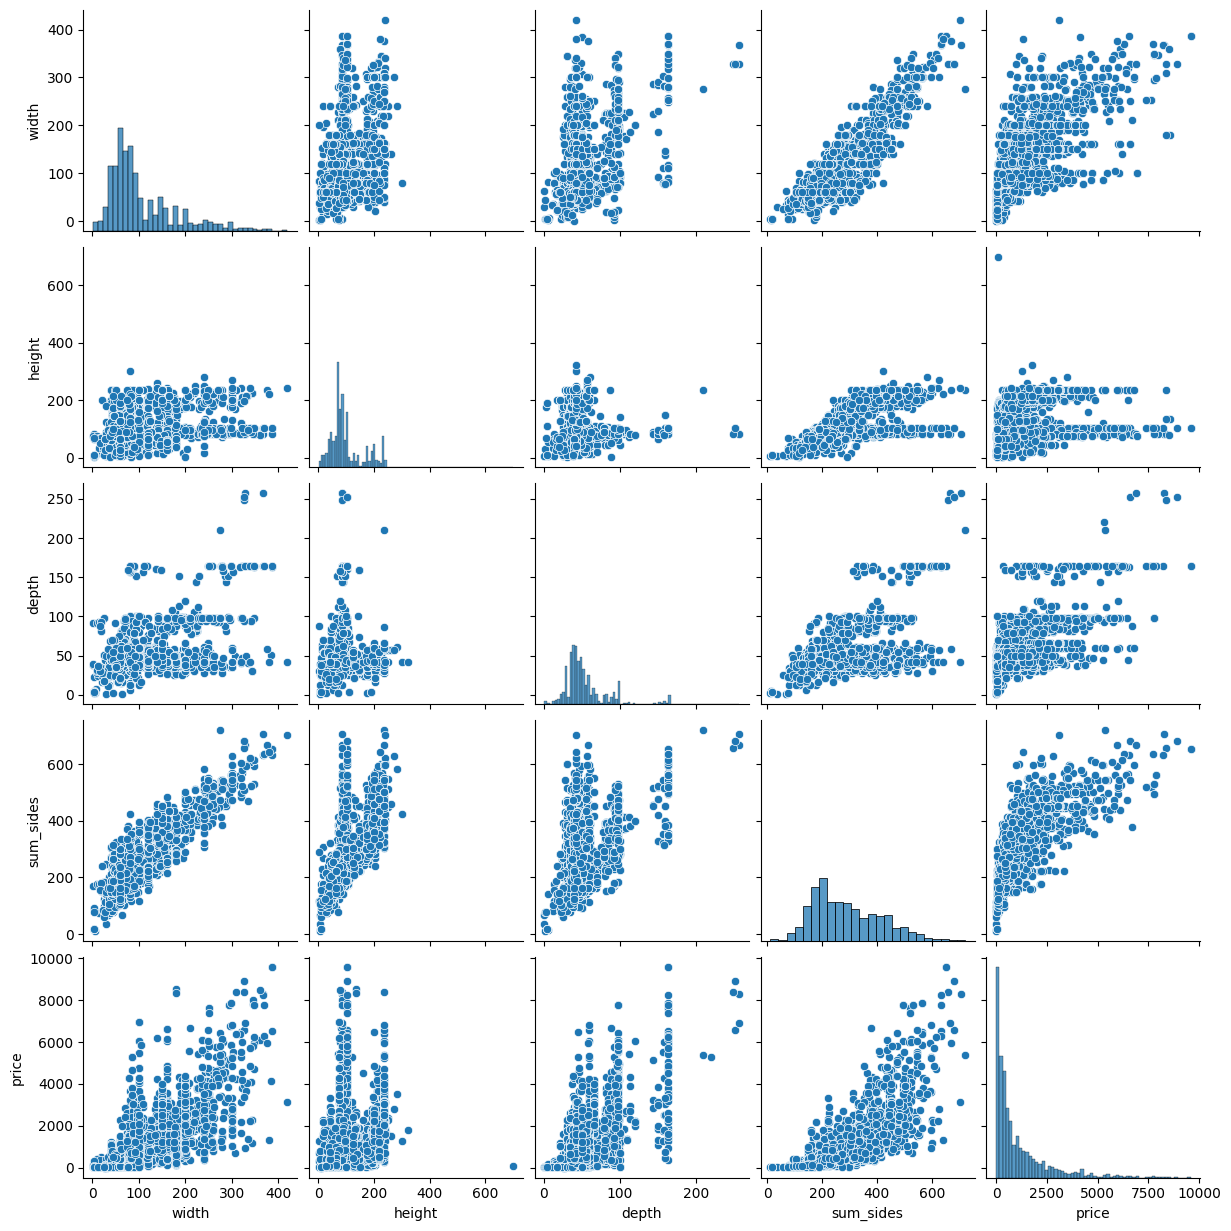

In [120]:
features = ["width", "height", "depth", "sum_sides", "price"]

sns.pairplot(df, vars=features)

<AxesSubplot: >

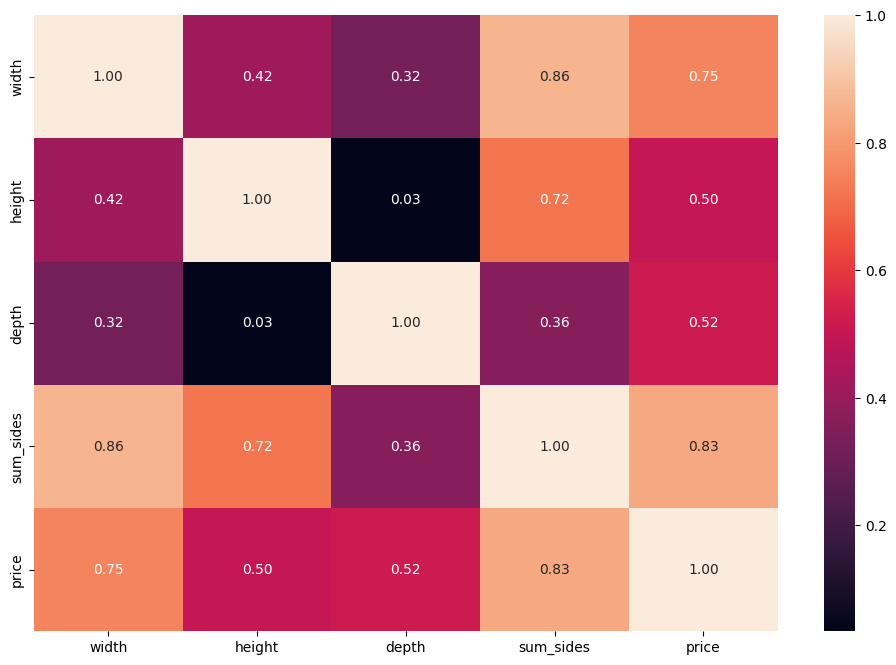

In [121]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(method='spearman'), annot=True, fmt='.2f')

- Из графика pairplot видна корреляция между суммой сторон товара и его ценой. При этом, возможно, что коэффициент корреляции квадратичный.
- Heatmap показал, что между суммой сторон и ценой есть линейная связь.
- Анализ показал, что между габаритами и ценой есть связь, однако для точного определения ее характера нужно больше данных.

## Гипотеза 6

### На дорогие товары выше размер скидки.

<div class="alert alert-block alert-warning"> 
И что нам делать с габаритами? =) Мне кажется, что стулья и кровати проверять по габаритами точно не надо, а также и другие категории =) 
</div>

In [122]:
df_discount = df[df.flg_discount == 1]
df_discount

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,flg_old_price,discount_amount,flg_discount,sum_sides
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,2375.0,True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN,1,199.0,1,NaN
13,50420329,FREKVENS,Bar furniture,177.0,295.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,1,118.0,1,200.0
17,50363649,KULLABERG,Bar furniture,140.0,175.0,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0,1,35.0,1,NaN
23,90400517,EKEDALEN,Bar furniture,796.0,995.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-tabl...,No,"Bar table, 120x80 cm",Ehlén Johansson,NaN,105.0,80.0,1,199.0,1,NaN
26,40400529,EKEDALEN,Bar furniture,796.0,995.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-tabl...,No,"Bar table, 120x80 cm",Ehlén Johansson,NaN,105.0,80.0,1,199.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,820.0,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0,1,70.0,1,NaN
3690,9158152,ELVARLI,Wardrobes,1572.0,1755.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0,1,183.0,1,NaN
3691,59157541,ELVARLI,Wardrobes,924.0,1050.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0,1,126.0,1,NaN
3692,89157573,ELVARLI,Wardrobes,2745.0,3130.0,True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0,1,385.0,1,NaN


<AxesSubplot: xlabel='price', ylabel='discount_amount'>

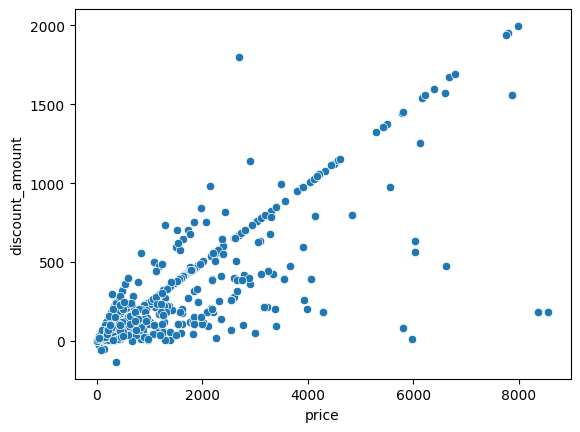

In [123]:
sns.scatterplot(data=df_discount, x="price", y="discount_amount")

- Исходя из имеющихся данных размер скидки действительно выше у дорогих товаров. При этом, по графику, что на значительную группу товаров скидка выражалась в процентах (на прямой расположены товары с одинаковой скидкой в процентном выражении).

## Гипотеза 7

### Дизайнер влияет на цену товара

In [124]:
df.designer.value_counts().values
#Попытаемся доказать гипотезу, проанализировав 6 дизайнеров с наибольшим кол-вом товаров (>100 товаров)

array([828, 161, 151, 134, 122, 120,  75,  75,  70,  70,  64,  60,  57,
        55,  53,  46,  31,  31,  28,  28,  27,  27,  26,  26,  23,  23,
        23,  22,  22,  22,  22,  21,  19,  17,  17,  17,  16,  15,  15,
        14,  14,  14,  12,  12,  12,  12,  12,  12,  12,  11,  11,  11,
        11,  11,  10,  10,  10,  10,  10,  10,  10,   9,   9,   9,   9,
         9,   8,   8,   8,   8,   8,   8,   8,   8,   8,   7,   7,   7,
         7,   7,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   

In [125]:
df.designer.value_counts().index[:6]

Index(['IKEA of Sweden', 'Ehlén Johansson', 'Francis Cayouette',
       'Ola Wihlborg', 'K Hagberg/M Hagberg', 'Jon Karlsson'],
      dtype='object')

<AxesSubplot: xlabel='designer', ylabel='price'>

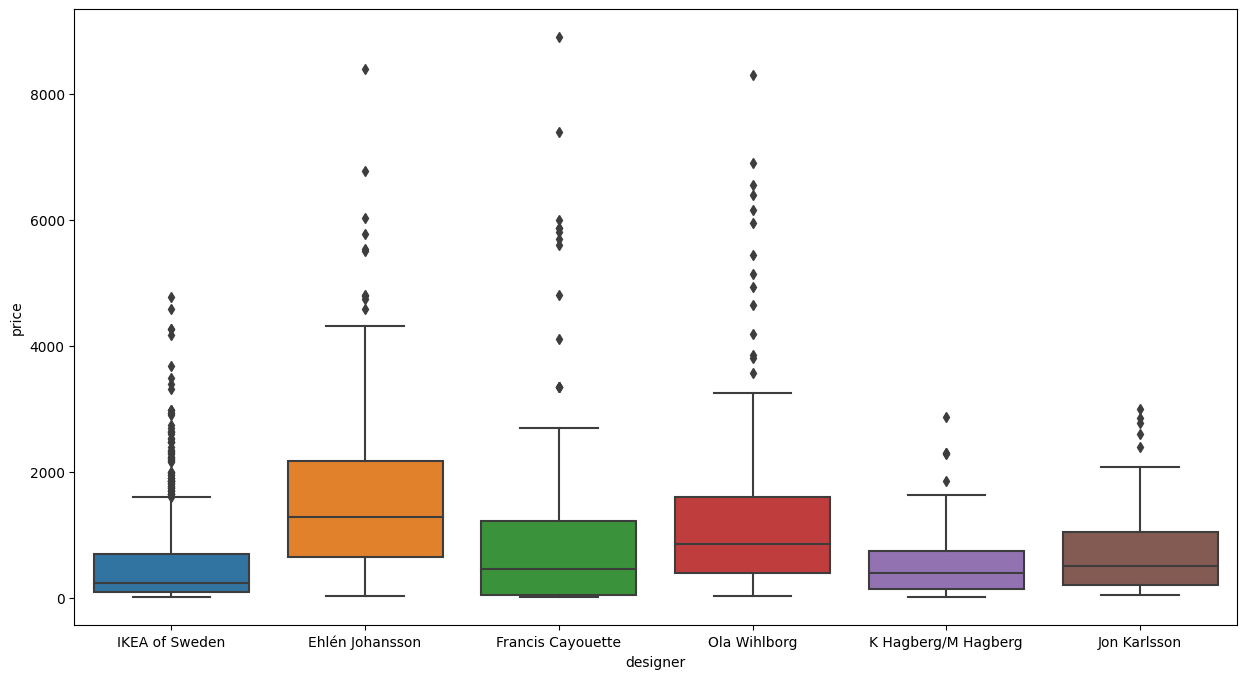

In [126]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x="designer", y="price", order=df.designer.value_counts().iloc[:6].index)

- График показал, что цены разны дизайнеров значительно различаются. Наибольшей среднее ценой из первой 6 обладает Ehlen Johansson. Наименьшей - IKEA 

# Выводы

Какие из ваших гипотез подтвердились? Попробуйте сделать краткие выводы о данных на основании анализа

1) Подтвердились 5 из 7 гипотез. Гипотеза 1 была опровергнута, а для гипотезы 2 неободимо больше данных. В целом, признак sellable_online не информативен из-за дисбаланса.  
2) Цена коррелирует с габаритами, что важно, так как в случае решение задачи предсказании цены по характеристикам имеет смысл расмотреть линейную регрессию.  
3) Признаки category и designer важны, так как их значения определенно связаны с ценовыми показателями.  
4) Размер скидки взаимосвязон с ценой. Вероятнее всего скидка на товары выражена в процентах, что может вывести на то, что дополнительный признак "percent_discount" может быть полезен для будущих моделей.